# **Lab 5**

# Unsupervised Learning → Clustering

---

# K-means clustering


In [1]:
import pandas as pd

In [2]:
mushrooms_df = pd.read_csv("Datasets/mushrooms.csv")
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushrooms_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
mushrooms_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
mushrooms_df.shape

(8124, 23)

In [6]:
mushrooms_df["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

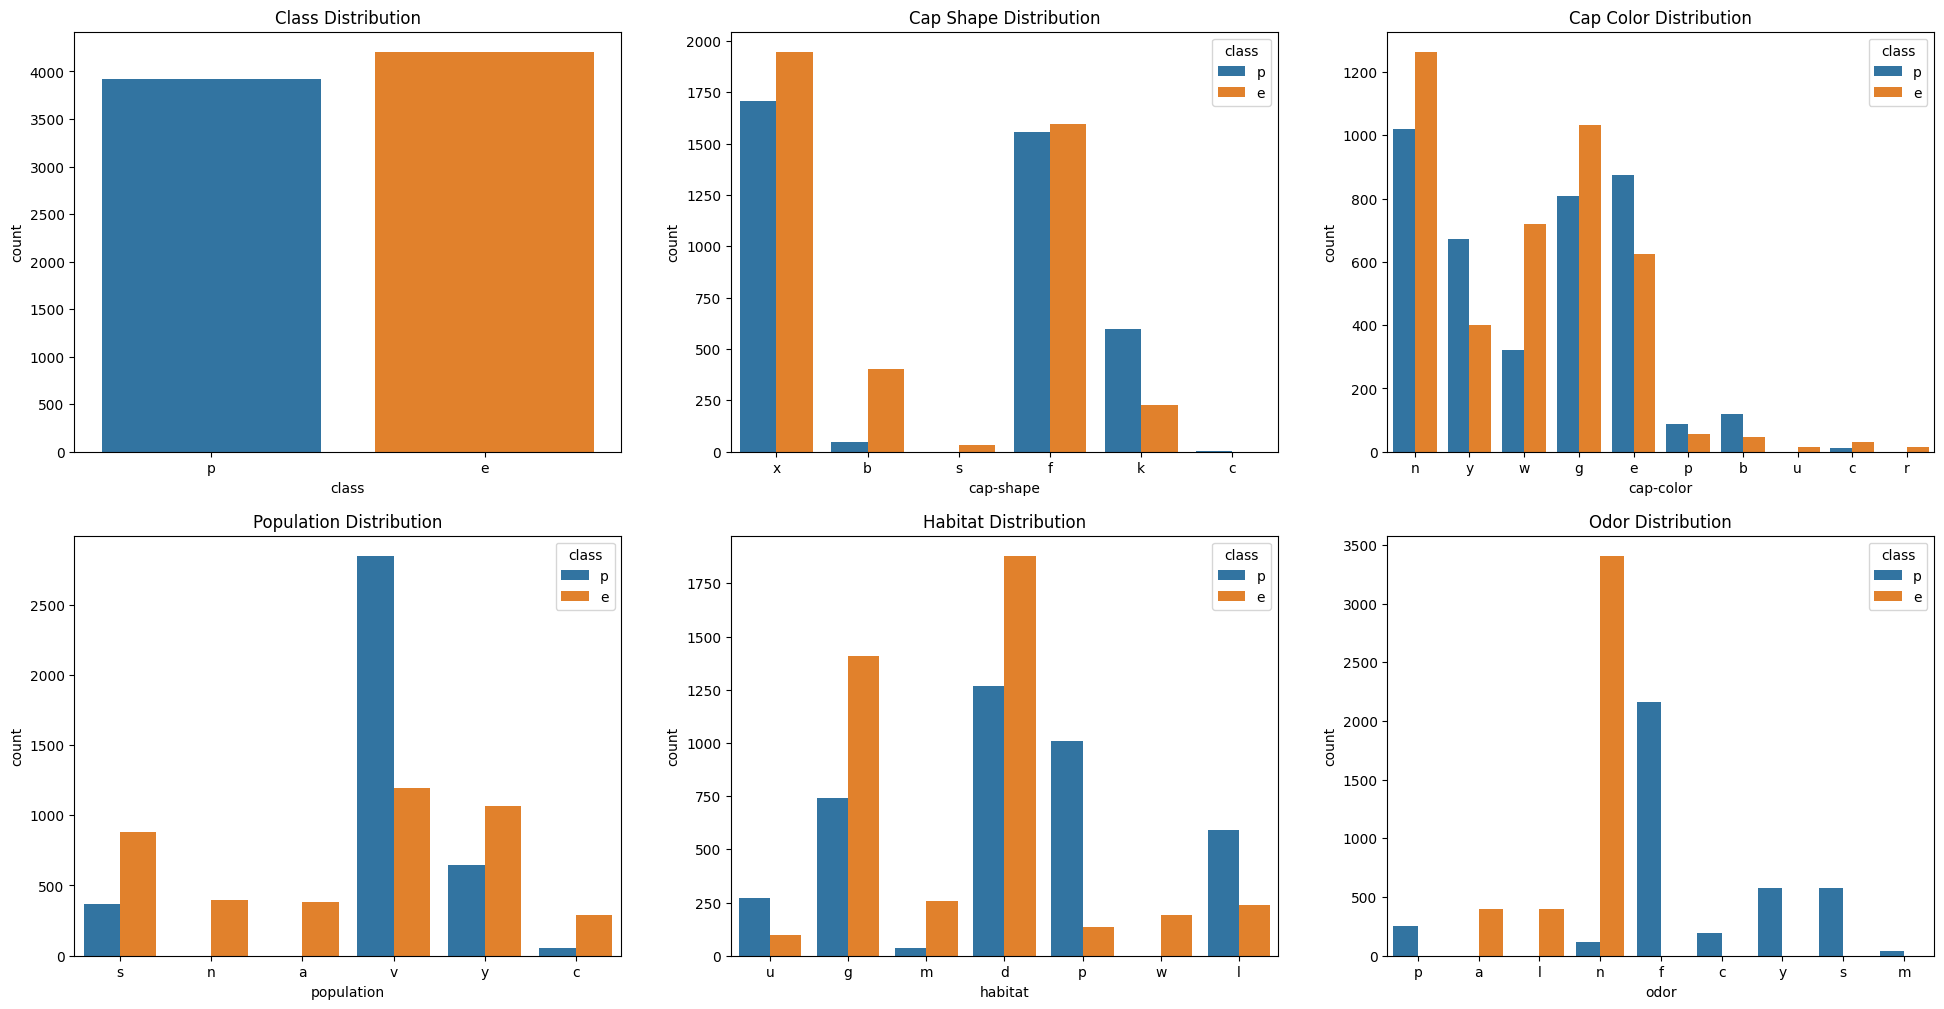

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 12))
plt.subplot(2, 3, 1)
sns.countplot(data=mushrooms_df, x="class", hue="class")
plt.title("Class Distribution")

plt.subplot(2, 3, 2)
sns.countplot(data=mushrooms_df, x="cap-shape", hue="class")
plt.title("Cap Shape Distribution")

plt.subplot(2, 3, 3)
sns.countplot(data=mushrooms_df, x="cap-color", hue="class")
plt.title("Cap Color Distribution")


plt.subplot(2, 3, 4)
sns.countplot(data=mushrooms_df, x="population", hue="class")
plt.title("Population Distribution")

plt.subplot(2, 3, 5)
sns.countplot(data=mushrooms_df, x="habitat", hue="class")
plt.title("Habitat Distribution")
# plt.tight_layout()

plt.subplot(2, 3, 6)
sns.countplot(data=mushrooms_df, x="odor", hue="class")
plt.title("Odor Distribution")

plt.show()

In [8]:
X = mushrooms_df.drop(columns=["class"])
y = mushrooms_df["class"]

In [9]:
from sklearn.preprocessing import OrdinalEncoder

# label encoder accepts a column at a time, OrdinalEncoder can accept the whole flipping data frame, don't let the name fool you, it doesn't do any ordinal labeling, its still illogical
encoder = OrdinalEncoder()
x = encoder.fit_transform(X)
type(x)

numpy.ndarray

In [10]:
X = pd.DataFrame(x, columns=X.columns)
X.dtypes

cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises                     float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [11]:
y.dtypes

dtype('O')

In [12]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=42)

k_means.fit(X)
k_labels = k_means.labels_
k_labels

array([0, 0, 0, ..., 0, 1, 0], shape=(8124,), dtype=int32)

In [13]:
type(k_labels)

numpy.ndarray

In [14]:
# some unsupervised metrics to evaluate clustering not covered in lab, just gpted these, ignore

from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

# Silhouette Score (higher is better, range: -1 to 1)
silhouette = silhouette_score(X, k_labels)
print(f"Silhouette Score: {silhouette:.4f}")

# Davies-Bouldin Index (lower is better)
davies_bouldin = davies_bouldin_score(X, k_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

# Calinski-Harabasz Score (higher is better)
calinski = calinski_harabasz_score(X, k_labels)
print(f"Calinski-Harabasz Score: {calinski:.4f}")

# Inertia (within-cluster sum of squares)
print(f"Inertia: {k_means.inertia_:.4f}")

Silhouette Score: 0.2870
Davies-Bouldin Index: 1.1844
Calinski-Harabasz Score: 3056.0121
Inertia: 302164.5578


In [15]:
from sklearn.metrics import accuracy_score

map_dict = {0: "e", 1: "p"}
predictions = pd.Series(k_labels).map(map_dict)

accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7090


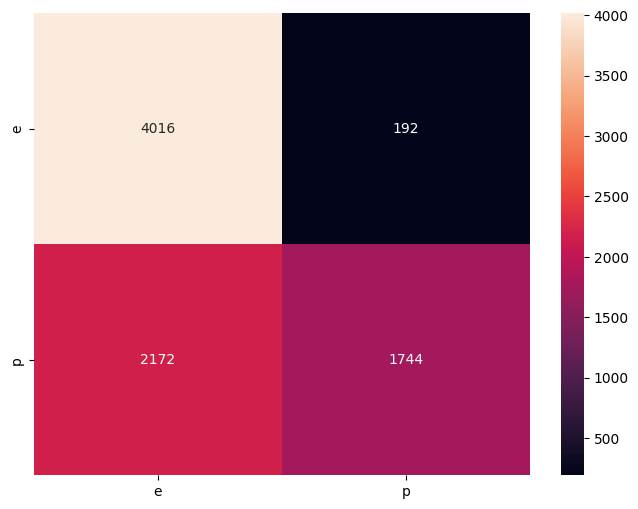

In [16]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y, predictions)
# sns.heatmap(
#     cm,
#     annot=True,
#     fmt="d",
#     cmap="Blues",
#     xticklabels=["e", "p"],
#     yticklabels=["e", "p"],
# )
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["e", "p"],
    yticklabels=["e", "p"],
)
plt.show()

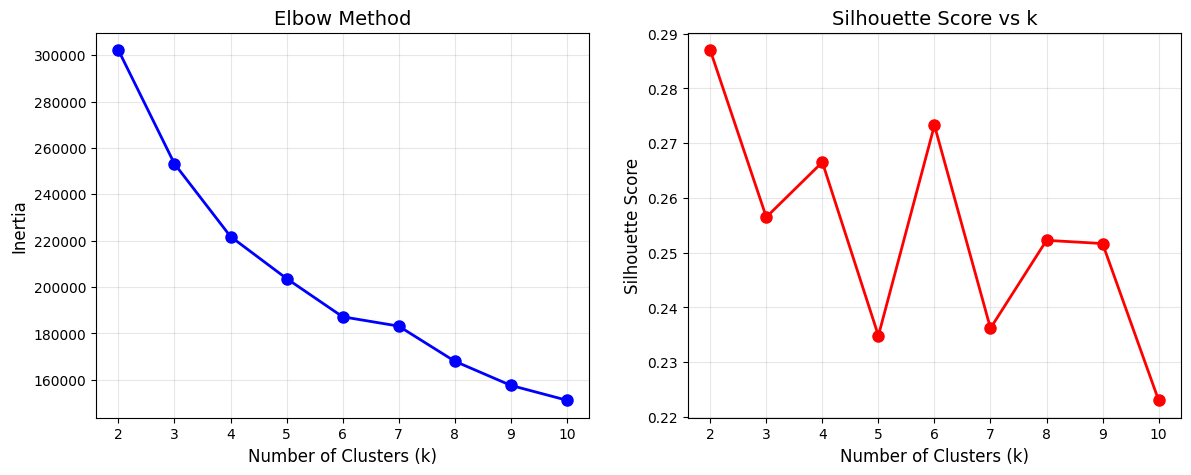

In [ ]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.title("Elbow Method", fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, "ro-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs k", fontsize=14)
plt.grid(True, alpha=0.3)


- pretty obvious that 6 is the best we got, but we won't go for 6. why not bro? because we already know the logical number of clusters, we already know that this dataset contains either poisonous or edible mushrooms, so we should make 2 clusters, not 6. so don't use elbow method blindly


- the secon code given in slides is pretty illogical, using label encoder iteratively is a wrose appraoch compared to ordinal encoder on the whole dataframe.
- choosing k=3 is compleltly illogical since the mushrooms are either edible or poisonous, what would the third cluster even represent?
- this mushroom dataset has 23 total columns/features, excluding y, we have a 22D visualization. So, we need PCA if we wanna see these clusters since we can't visualize a 22D dataset.
- lets just do PCA on this first evaludation with k=2 instead of the illogical k=3 approach in the slides


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(8124, 2)

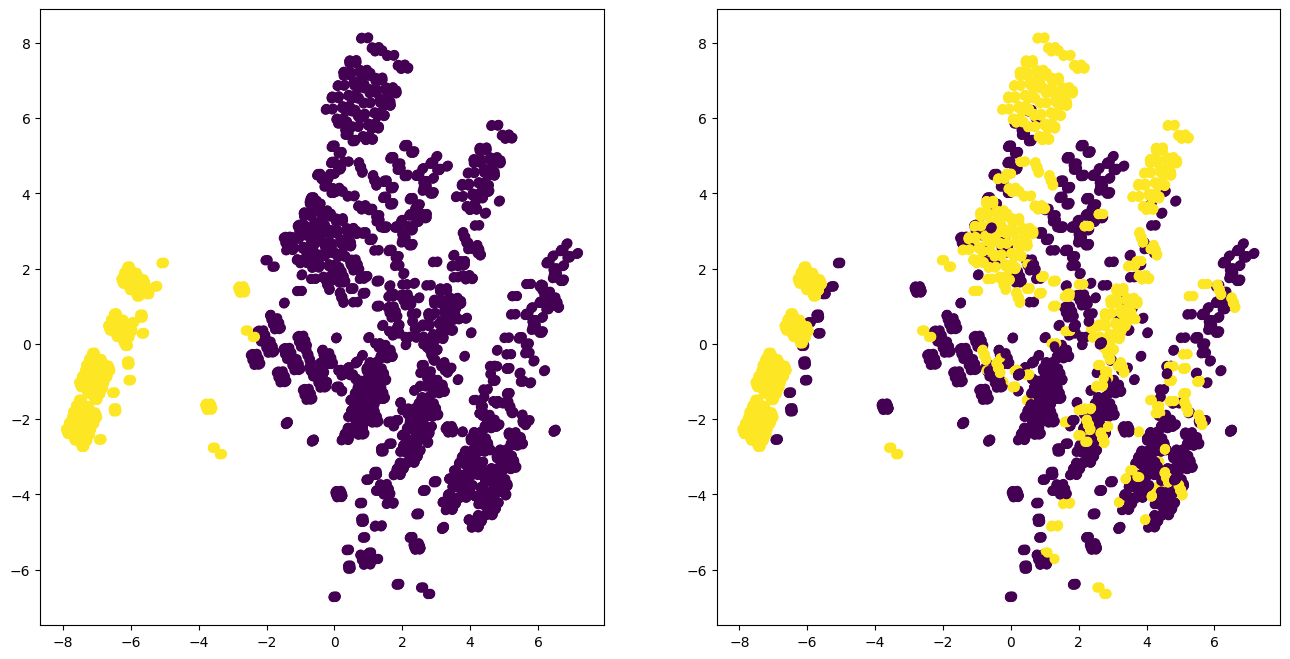

In [19]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k_labels)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.map({"e": 0, "p": 1}))
plt.show()

- now, one thing that is very clearn from seeing the actual value graph (second graph above) is that no matter what, k-means would have done shit on this dataset, the clusters are all over the place.
- this is a nice place to try out the alternative (DBScan [Density based spatial clustering of application with noise]).
- DBScan finds super dense regions and clusters them as one. dense regions become groups/clusters together so it helps if the data is all over the place
- another advantage is that it finds k automatically

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Clusters found: {n_clusters}")
print(f"Noise points: {list(dbscan_labels).count(-1)}")

Clusters found: 185
Noise points: 826


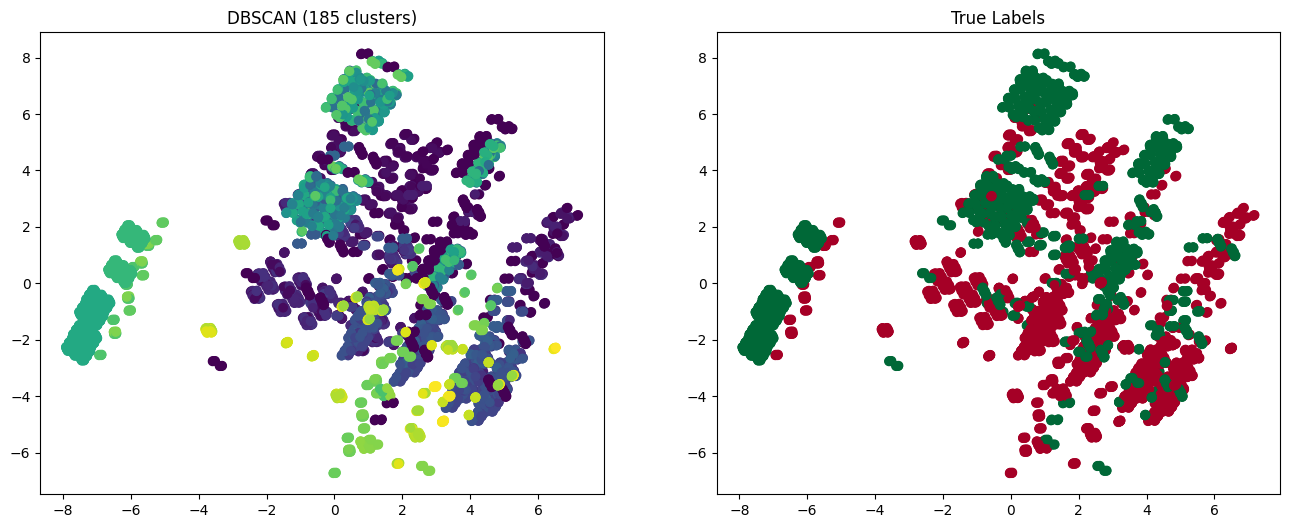

In [21]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap="viridis")
plt.title(f"DBSCAN ({n_clusters} clusters)")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.map({"e": 0, "p": 1}), cmap="RdYlGn")
plt.title("True Labels")

plt.show()

- looks very fancy and cool doesn't it? but its completely useless, dbscan got way too many density points and made too many groups, from domain knowledge we know that 2 clusters is what we need, not flipping 185.

---
